In [20]:
#importing 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#uploading dataset
wine = pd.read_csv('C:/Users/jones/Downloads/wine+quality/winequality-red.csv', delimiter = ';')
wine.columns = wine.columns.str.strip()

#classifing x and y
x = wine[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wine['quality']

#creating traing and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

#trying a linear regression model 
lr = LinearRegression().fit(x_train, y_train)
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

Training set score: 0.35
Test set score: 0.37


In [21]:
#importing ridge model 
from sklearn.linear_model import Ridge

#linear model wasnt producing good results so I tried a Ridge model
ridge = Ridge().fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

Training set score: 0.35
Test set score: 0.37


In [48]:
#importing lasso model
from sklearn.linear_model import Lasso
import numpy as np

#both the linear regression and ridge model were producing the same numer so I tried lasso and changing some of the parameters
lasso = Lasso(alpha = 0.0001, max_iter=100000).fit(x_train, y_train)
#adding a max itteration so it uses all of the features because it was defaulting to 1
#adding alpha parameter to force the coefficents to move  more towards zero to help with generalization

print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))

#added to show the number of features being used so I knew all of them were beig used
print("Numer of features being used:", np.sum(lasso.coef_ !=0))

Training set score: 0.35
Test set score: 0.37
Numer of features being used: 10


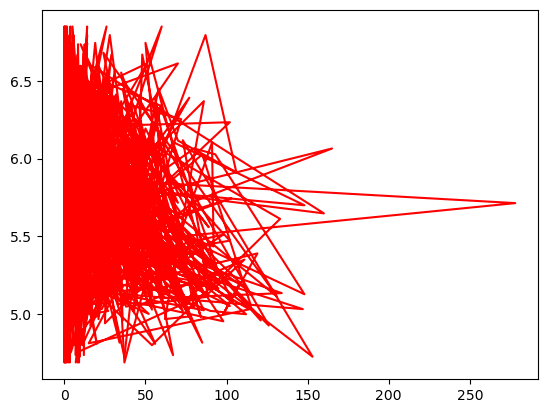

In [41]:
import matplotlib.pyplot as plt
import mglearn

plt.plot(x_test, lasso.predict(x_test), color='red', label='Linear Regression Line')


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(x_train, y_train)

print("Shape of probabilities:", gbrt.predict_proba(x_test).shape)

Shape of probabilities: (400, 6)


In [46]:
print("Predicted Probabilities:")
print(gbrt.predict_proba(x_test[:6]))

Predicted Probabilities:
[[5.21992197e-05 4.66521257e-03 7.41417577e-01 2.26578494e-01
  2.72026028e-02 8.39135750e-05]
 [1.66562322e-05 1.10934125e-02 9.32091611e-01 5.12810437e-02
  5.48507926e-03 3.21969048e-05]
 [6.31421556e-05 9.99706816e-03 7.43388185e-01 2.29804816e-01
  1.66757825e-02 7.10054849e-05]
 [6.37816627e-05 4.53683725e-02 5.74700360e-01 3.64139396e-01
  1.56651820e-02 6.29080091e-05]
 [2.10509911e-05 2.27663582e-03 9.63387459e-02 8.85310648e-01
  1.59941499e-02 5.87696735e-05]
 [1.88406711e-05 1.32057927e-02 8.38592703e-01 1.35133546e-01
  1.29951205e-02 5.39967860e-05]]
